In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('DengueData2022.xlsx')

In [3]:
import xgboost as xgb
from xgboost import plot_importance
import numpy as np

In [4]:
data['Affected_Lag1'] = data['Affected'].shift(1)
data.dropna(inplace=True)

In [5]:
X = data[['Affected_Lag1']]
y = data['Affected']

In [6]:
# split = int(0.85 * len(X))
# X_train, X_test = X[:split], X[split:]
# y_train, y_test = y[:split], y[split:]
X_train, X_test, y_train, y_test = X[:-17],X[135:],y[:-17],y[135:]

In [7]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [8]:
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}


In [9]:
xgb_model = xgb.train(params, dtrain, num_boost_round=10000)

In [10]:
xgb_predictions = xgb_model.predict(dtest)

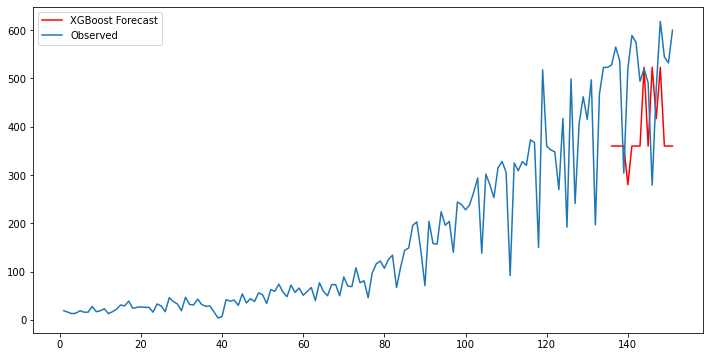

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, xgb_predictions, color='red', label='XGBoost Forecast')

plt.plot(data['Affected'].index, data['Affected'].values, label='Observed')
plt.legend()
plt.show()

In [12]:

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(data['Affected'][135:], xgb_predictions)
print('Test MSE: %.3f' % mse)

rmse = sqrt(mean_squared_error(data['Affected'][135:], xgb_predictions))
print('Test RMSE: %.3f' % rmse)

Test MSE: 30627.758
Test RMSE: 175.008
